In [1]:
# Importing Libraries
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from Lspin import Lspin, DataSetMeta
import matplotlib.colors as colors

## Data Generation


\begin{align*}
y = &\begin{cases} 
x_1 \times x_2 + 2x_{21} & \text{if } x_{21} = -1 \\
x_2 \times x_3 + 2x_{21} & \text{if } x_{21} = 0 \\
x_3 \times x_4 + 2x_{21} & \text{if } x_{21} = 1
\end{cases}
\end{align*}


In [3]:
N_train = 1500
N_valid=300
N_test = 300
D=20
np.random.seed(42)
group_size=int(N_train/3)
X_train = np.sign(np.random.normal(0,1,(N_train,D)))
X_train = np.concatenate((X_train,
                         np.concatenate(([-1]*group_size,[0]*group_size,[1]*group_size)).reshape(-1,1)),axis=1)
Y_train = np.concatenate((X_train[:group_size,0]*X_train[:group_size,1]+2*X_train[:group_size,-1],
                          X_train[group_size:(group_size*2),1]*X_train[group_size:(group_size*2),2]+2*X_train[group_size:(group_size*2),-1],
                          X_train[(group_size*2):(group_size*3),2]*X_train[(group_size*2):(group_size*3),3]+2*X_train[(group_size*2):(group_size*3),-1],
                         ),axis=0)
group_size=int(N_valid/3)
X_valid = np.sign(np.random.normal(0,1,(N_valid,D)))
X_valid = np.concatenate((X_valid,
                         np.concatenate(([-1]*group_size,[0]*group_size,[1]*group_size)).reshape(-1,1)),axis=1)
Y_valid = np.concatenate((X_valid[:group_size,0]*X_valid[:group_size,1]+2*X_valid[:group_size,-1],
                          X_valid[group_size:(group_size*2),1]*X_valid[group_size:(group_size*2),2]+2*X_valid[group_size:(group_size*2),-1],
                          X_valid[(group_size*2):(group_size*3),2]*X_valid[(group_size*2):(group_size*3),3]+2*X_valid[(group_size*2):(group_size*3),-1],
                         ),axis=0)
group_size=int(N_test/3)
X_test = np.sign(np.random.normal(0,1,(N_test,D)))
X_test = np.concatenate((X_test,
                         np.concatenate(([-1]*group_size,[0]*group_size,[1]*group_size)).reshape(-1,1)),axis=1)
Y_test = np.concatenate((X_test[:group_size,0]*X_test[:group_size,1]+2*X_test[:group_size,-1],
                          X_test[group_size:(group_size*2),1]*X_test[group_size:(group_size*2),2]+2*X_test[group_size:(group_size*2),-1],
                          X_test[(group_size*2):(group_size*3),2]*X_test[(group_size*2):(group_size*3),3]+2*X_test[(group_size*2):(group_size*3),-1],
                         ),axis=0)
np.random.seed(42)
train_sample_indices = np.arange(N_train)
np.random.shuffle(train_sample_indices)

X_train = X_train[train_sample_indices,:]
Y_train = Y_train[train_sample_indices]
valid_sample_indices = np.arange(N_valid)
np.random.shuffle(valid_sample_indices)

X_valid = X_valid[valid_sample_indices,:]
Y_valid = Y_valid[valid_sample_indices]
test_sample_indices = np.arange(N_test)
np.random.shuffle(test_sample_indices)

X_test = X_test[test_sample_indices,:]
Y_test = Y_test[test_sample_indices]

In [4]:
# Print shapes to verify
print("Train shapes:", X_train.shape, Y_train.shape)
print("Validation shapes:", X_valid.shape, Y_valid.shape)
print("Test shapes:", X_test.shape, Y_test.shape)

# Create PyTorch datasets
train_dataset = DataSetMeta(X_train, Y_train, Y_train)
valid_dataset = DataSetMeta(X_valid, Y_valid, Y_valid)
test_dataset = DataSetMeta(X_test, Y_test, Y_test)

In [16]:
# Model parameters
model_params = {
    'input_node': X_train.shape[1],
    'hidden_layers_node': [500, 100, 1],
    'output_node': 1,
    'gating_net_hidden_layers_node': [100],
    'display_step': 100,
    'activation_gating': 'tanh',
    'activation_pred': 'l_relu',
    'lam': 1,
    'sigma': 0.5,
    'a': 1,
    'gamma1': 0,
    'gamma2': 0,
    'num_meta_label': None,
    'stddev_input': 0.1,
    'stddev_input_gates': 0.1,
    'seed': 42,
    'val': True  # Enabling validation during training
}

# Training parameters
training_params = {
    'batch_size': 256,
    'num_epochs': 1000,  
    'lr': 0.05,  
    'compute_sim': False
}

In [17]:
# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Lspin(**model_params).to(device)
# Train the model
train_losses, val_losses, val_acc = model.train_model(
    dataset=train_dataset, 
    valid_dataset=valid_dataset,
    batch_size=training_params['batch_size'], 
    num_epoch=training_params['num_epochs'], 
    lr=training_params['lr'], 
    compute_sim=training_params['compute_sim']
)

Epoch [100/1000], Train Loss: 0.4249, Validation Loss: 0.0046
Epoch [200/1000], Train Loss: 0.3340, Validation Loss: 0.0019
Epoch [300/1000], Train Loss: 0.3429, Validation Loss: 0.0057
Epoch [400/1000], Train Loss: 0.3288, Validation Loss: 0.0031
Epoch [500/1000], Train Loss: 0.3238, Validation Loss: 0.0015
Epoch [600/1000], Train Loss: 0.3203, Validation Loss: 0.0012
Epoch [700/1000], Train Loss: 0.3125, Validation Loss: 0.0032
Epoch [800/1000], Train Loss: 0.3128, Validation Loss: 0.0044
Epoch [900/1000], Train Loss: 0.3401, Validation Loss: 0.0020
Epoch [1000/1000], Train Loss: 0.3093, Validation Loss: 0.0049
Training complete!
Final Training Loss: 0.3093, Final Validation Loss: 0.0049


Mean Squared Error on the test: 0.00534


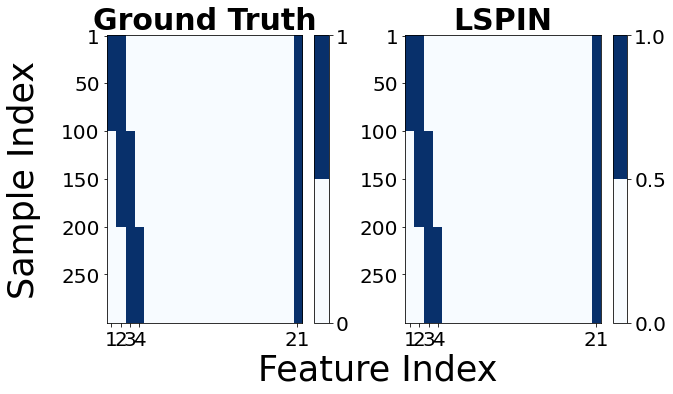

In [18]:
# Test the model
predictions,alpha = model.test(X_test)
predictions=predictions.reshape(-1)
# Calculate Mean Squared Error on the test set
mse = np.mean((Y_test - predictions) ** 2)
print("Mean Squared Error on the test: {:.5f}".format(mse))

# Visualizing the gate matrix
gate_matrix_test = model.get_prob_alpha(torch.FloatTensor(X_test).to(device))

# Compare to ground truth
g_test = np.zeros((X_test.shape[0], X_test.shape[1]))
for i in range(g_test.shape[0]):
    if X_test[i, -1] == -1:
        g_test[i, 0] = 1
        g_test[i, 1] = 1
    elif X_test[i, -1] == 0:
        g_test[i, 1] = 1
        g_test[i, 2] = 1
    elif X_test[i, -1] == 1:
        g_test[i, 2] = 1
        g_test[i, 3] = 1
g_test[:, -1] = 1

fig, axes = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(10, 6))

cmap = plt.cm.Blues 
bounds = [0, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)
fig.add_subplot(111, frameon=False)

title_size = 30
xlabel_size = 35
ylabel_size = 35
xtick_size = 20
ytick_size = 20
bar_label_size = 20

plt.rc('xtick', labelsize=20)

# Test
y_axis_order = np.argsort(X_test[:, -1])

im5 = axes[0].imshow(g_test[y_axis_order, :], aspect='auto', cmap=cmap, norm=norm)
axes[0].set_title("Ground Truth", fontsize=title_size, fontweight="bold")
axes[0].set_ylabel("Sample Index", fontsize=ylabel_size, labelpad=20)
axes[0].set_xticks([0, 1, 2, 3, 20])
axes[0].set_xticklabels([1, 2, 3, 4, 21])
axes[0].set_yticks([0, 49, 99, 149, 199, 249])
axes[0].set_yticklabels([1, 50, 100, 150, 200, 250], fontsize=ytick_size)

im7 = axes[1].imshow(gate_matrix_test[y_axis_order, :].cpu().numpy(), aspect='auto', cmap=cmap,norm=norm)
axes[1].set_title("LSPIN", fontsize=title_size, fontweight="bold")
axes[1].set_yticks([0, 49, 99, 149, 199, 249])
axes[1].set_yticklabels([1, 50, 100, 150, 200, 250], fontsize=ytick_size)

cbar = fig.colorbar(im5, ax=axes[0], cmap=cmap, norm=norm, boundaries=bounds, ticks=[0, 1])
cbar.ax.tick_params(labelsize=bar_label_size)

cbar = fig.colorbar(im7, ax=axes[1], cmap=cmap)
cbar.ax.tick_params(labelsize=bar_label_size)

plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Feature Index", fontsize=xlabel_size)
plt.tight_layout()
plt.show()